In [2]:
# Data pre-processing
from sklearn.preprocessing import (
    StandardScaler,
    RobustScaler,
    MinMaxScaler,
    MaxAbsScaler,
    RobustScaler,
)
from sklearn.model_selection import train_test_split

# Modelling
from sklearn.metrics import (
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    auc,
    precision_score,
    accuracy_score,
    recall_score,
    classification_report,
    confusion_matrix
)

from yellowbrick.classifier import ROCAUC, PrecisionRecallCurve

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier)

import xgboost as xgb

# for feature engineering
from feature_engine import encoding as ce

# Evaluation & CV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score


# pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [8]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.6 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from collections import Counter

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

from pathlib import Path
import os
os.getcwd()


'/content'

In [4]:
path = Path('/content/drive/MyDrive/Colab Notebooks/Employee.csv')

In [5]:
# Data pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate

# Modelling
from sklearn.metrics import (
    roc_auc_score,
    precision_score,
    accuracy_score,
    recall_score,
)

from yellowbrick.classifier import ROCAUC, PrecisionRecallCurve

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier)

import xgboost as xgb

In [9]:
# for feature engineering
from feature_engine import encoding as ce

# Evaluation & CV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import (
    KFold,
    cross_val_score,
    RepeatedStratifiedKFold)


# pipeline
from sklearn.pipeline import Pipeline

# for oversampling
from imblearn.over_sampling import ADASYN, SMOTE

# since sklearn pipeline doesn't work well with oversampling
# we need to use imblearn package's pipeline
from imblearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline as imbPipeline

# for hyperparameter tuning
import optuna



import numpy as np
from numpy import where
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import warnings
from collections import Counter
warnings.filterwarnings('ignore')

import sys
from pathlib import Path
import os
os.getcwd()

'/content'

In [10]:
# Visualizations libraries
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable

### EDA

**Data Load**

In [11]:
df = pd.read_csv(path)
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [12]:
df.shape

(4653, 9)

We have 4 653  data with 9 features.

In [ ]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


Data scales vary so that we might need to use feature scaling methods if we use linear models.

In [ ]:
# Are there missing observations?
[var for var in df.columns if df[var].isnull().mean()>0]

[]

This dataset doesn't have any missing values.

In [ ]:
df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

Before we take a look at data, let's create two lists for categorical and numerical variables.

In [ ]:
# create categorical variable list
cat_vars = [var for var in df.columns
            if df[var].dtype == 'O' and var != 'LeaveOrNot']

# create numerical variable list
num_vars = [var for var in df.columns
           if df[var].dtype != 'O']

print('The number of categorical variables: {}'.format(len(cat_vars)))
print('The number of numerical variables: {}'.format(len(num_vars)))

The number of categorical variables: 4
The number of numerical variables: 5


### Data Exploration


**Target variable**

We have a classification problem and target is binary variable.

In [ ]:
# the percentage of the value distribution of target.
df['LeaveOrNot'].value_counts() / len(df)

0    0.656136
1    0.343864
Name: LeaveOrNot, dtype: float64

In [ ]:
# change the column name of target
df = df.rename(columns={'LeaveOrNot': 'Churn'})

# let's change the value of target
target_map = {1: 'Exist',
              0: 'Churn'}

df['Churn'] = df['Churn'].map(target_map)


In [ ]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,Churn
0,Bachelors,2017,Bangalore,3,34,Male,No,0,Churn
1,Bachelors,2013,Pune,1,28,Female,No,3,Exist
2,Bachelors,2014,New Delhi,3,38,Female,No,2,Churn
3,Masters,2016,Bangalore,3,27,Male,No,5,Exist
4,Masters,2017,Pune,3,24,Male,Yes,2,Exist


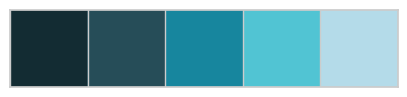

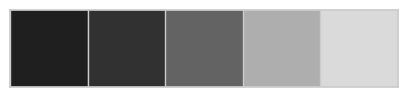

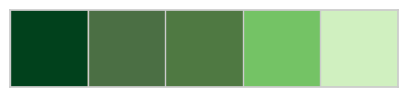

In [ ]:
# set up the colors for visualization
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']
sns.palplot(colors_blue)
sns.palplot(colors_dark)
sns.palplot(colors_green)

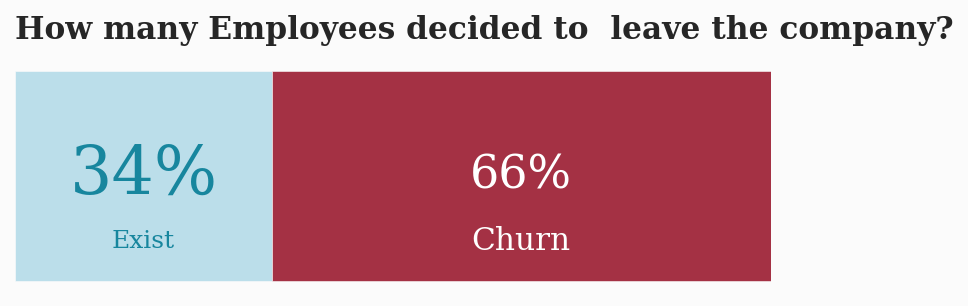

In [ ]:
# Create data to present
x = df.groupby(['Churn'])['Churn'].count()
y = len(df)
r = ((x/y)).round(2)
ratio = pd.DataFrame(r).T

fig, ax = plt.subplots(1,1,figsize=(6.5, 2), dpi=150)
background_color = '#fbfbfb'
fig.patch.set_facecolor(background_color) # set up background color
ax.set_facecolor(background_color) # set up background color

# Create barh graph
ax.barh(ratio.index, ratio['Exist'], color=colors_blue[4], alpha=0.9,
       ec=background_color, label='Exist')
ax.barh(ratio.index, ratio['Churn'], left=ratio['Exist'], color='#9b1b30',
       alpha=0.9, ec=background_color, label='Churn')

ax.set_xlim(0,1)
ax.set_xticks([]) # set up xtick as None
ax.set_yticks([]) # set up ytick as None
ax.legend().set_visible(False)
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

# set up the annotation for data
for i in ratio.index:
    ax.annotate(f"{int(ratio['Exist'][i]*100)}%", xy=(ratio['Exist'][i]/2, i),
               va = 'center', ha= 'center', fontsize=32, fontweight='light',
               fontfamily='serif', color=colors_blue[2])
    ax.annotate('Exist', xy=(ratio['Exist'][i]/2, -0.25), va='center', ha='center',
               fontsize=12, fontweight='light', fontfamily='serif', color=colors_blue[2])


for i in ratio.index:
    ax.annotate(f"{int(ratio['Churn'][i]*100)}%", xy=(ratio['Exist'][i]+ratio['Churn'][i]/2, i),
               va='center', ha='center', fontsize=22, fontweight='light',
               fontfamily='serif', color='white')
    ax.annotate('Churn', xy=(ratio['Exist'][i]+ratio['Churn'][i]/2, -0.25),
               va='center', ha='center', fontsize=15, fontweight='light', fontfamily='serif', color='white')


fig.text(0.125, 0.95, 'How many Employees decided to  leave the company?',
        fontfamily='serif', fontweight='bold', fontsize=15)

plt.show()

We have 66% of Existing Employees data and 34% of Attrited Employees data. Based on the percentage of the distribution of target, we can say that this dataset is imbalanced. Therefore, when we choose evaluation metrics, we need to consider imbalanced distribution of the target, and we should avoid to use accuracy.

**Numerical variables**

We have 5 numerical variables.

In [ ]:
def plot_nums(df, variable):
    """ Function to visualize histogram, q-q plot and box plot for continous variables"""
    plt.figure(figsize=(16, 4))

    plt.subplot(1,3,1)
    df[variable].hist(bins=30)
    plt.title('Histogram')
    plt.xlabel(variable)

    plt.subplot(1,3,2)
    stats.probplot(df[variable], plot=plt)

    plt.subplot(1,3,3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

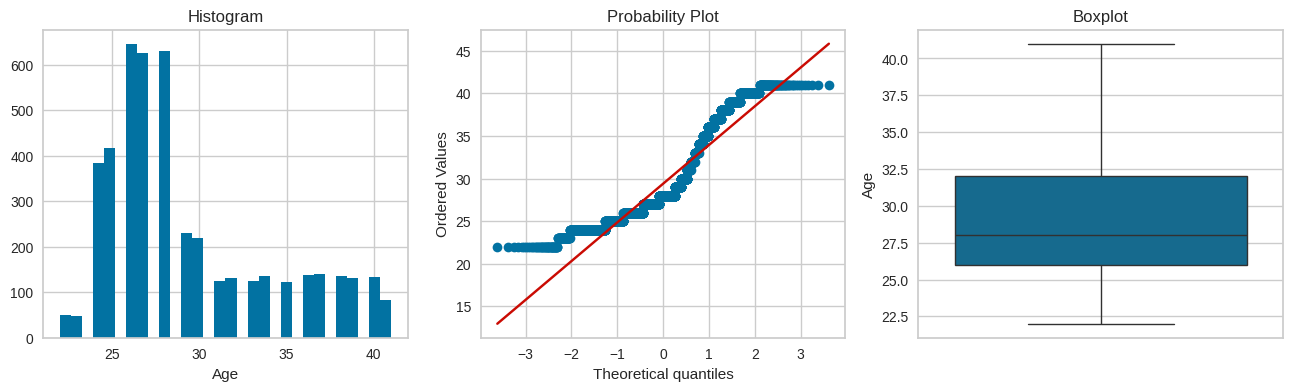

In [ ]:
for var in continous:
    plot_nums(df, var)

We saw the distributions of continuous variables.

Now, let's see the differences between churn customers and existing customers depending on each feature.

In [ ]:
# create two groups for Exist and Churn
Exist = df[df['Churn']!='Churn']
Churn = df[df['Churn']=='Churn']

In [ ]:
Exist.shape, Churn.shape

((1600, 9), (3053, 9))

In [ ]:
df[cat_vars].head(2)

,Education,City,Gender,EverBenched
0,Bachelors,Bangalore,Male,No
1,Bachelors,Pune,Female,No


**Categorical variables**

We have 4 categorical variables. Let's look at the number of cardinality in each categorical variable.

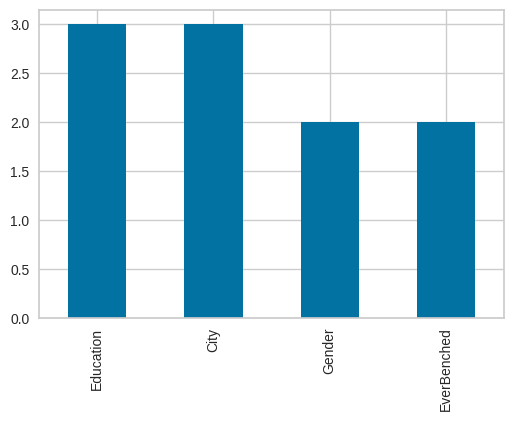

In [ ]:
df[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(6,4));

All categorical variables show low cardinality, this means that they have only few different labels. This is good as we don't need to tackle cardinality.

Next, let's explore whether each categorical variable has rare label.

In [ ]:
for var in cat_vars:
    print(var)
    print(df[var].value_counts()/len(df))
    print()

Education
Bachelors    0.773909
Masters      0.187621
PHD          0.038470
Name: Education, dtype: float64

City
Bangalore    0.478831
Pune         0.272512
New Delhi    0.248657
Name: City, dtype: float64

Gender
Male      0.597034
Female    0.402966
Name: Gender, dtype: float64

EverBenched
No     0.897271
Yes    0.102729
Name: EverBenched, dtype: float64



### Correlation between numerical variables

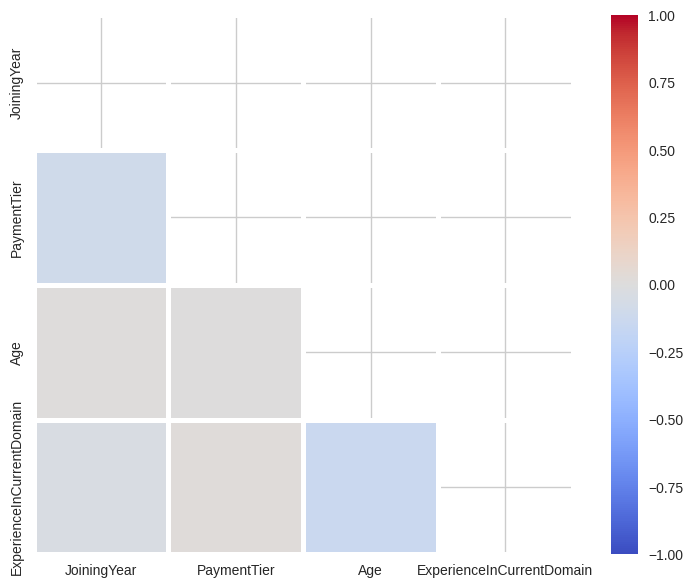

In [ ]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=bool)  # Replace np.bool with bool
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,7))

pl = sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1.0, vmin=-1.0,
                center=0, square=True, linewidths=2.5)
plt.show()


No High Correlation

### Feature Engineering

**Separate train and test set**

Before we perform feature engineering techniques, we need to separate train and test set, because some methods should learn parameters from ONLY train to avoid over-fitting.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Churn'], axis=1), #predictors
    df['Churn'], # target
    test_size=0.2, # the percentage of test size
    random_state=0, # for reproducibility
)

X_train.shape, X_test.shape

((3722, 8), (931, 8))

**Create function for evaluating model performances**

We would like to create function to evaluate model performances and this would help compare perfoamcnes.

I will use Random Forests for comparison and ROC-AUC score.

In [ ]:
def run_RFs(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=40, random_state=42, max_depth=3)
    rf.fit(X_train, y_train)

    print("Train set")
    train_pred = rf.predict_proba(X_train)
    print("Random Forests roc-auc: {}".format(roc_auc_score(y_train, train_pred[:,1])))

    print("Test set")
    test_pred = rf.predict_proba(X_test)
    print("Random Forests roc-auc: {}".format(roc_auc_score(y_test, test_pred[:, 1])))

    return roc_auc_score(y_train, train_pred[:,1]), roc_auc_score(y_test, test_pred[:, 1])

**Categorical encoding for Categorical variables**

In this section, I will compare the performance of the different feature cateogrical encoding techniques, and choose the best one for this dataset.

In [ ]:
# How many labels are in each category?
for cat in cat_vars:
    print(cat, "has {} labels".format(X_train[cat].nunique()))
    print(X_train[cat].unique())
    print()

Education has 3 labels
['Bachelors' 'Masters' 'PHD']

City has 3 labels
['New Delhi' 'Bangalore' 'Pune']

Gender has 2 labels
['Female' 'Male']

EverBenched has 2 labels
['Yes' 'No']



**One Hoe Encoding (OHE)**

One hot encoding, consists in encoding each categorical variable with different boolean variables (dummy variables) which take values 0 or 1, indicating if a category is present in an observation.

In [ ]:
X_train_ohe = X_train.copy()
X_test_ohe = X_test.copy()

In [ ]:
ohe_enc = ce.OneHotEncoder(
    top_categories=None,
    variables=cat_vars,
    drop_last=True
)

ohe_enc.fit(X_train_ohe)

OneHotEncoder(drop_last=True,
              variables=['Education', 'City', 'Gender', 'EverBenched'])

In [ ]:
X_train_ohe = ohe_enc.transform(X_train_ohe)
X_test_ohe = ohe_enc.transform(X_test_ohe)

In [ ]:
X_train_ohe.head(2)

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,Education_Bachelors,Education_Masters,City_New Delhi,City_Bangalore,Gender_Female,EverBenched_Yes
2980,2018,3,30,3,1,0,1,0,1,1
2527,2012,3,27,5,1,0,0,1,1,0


**Integer Encoding**

Integer encoding consist in replacing the categories by digits from 1 to n, where n is the number of distinct categories of the variable.

The numbers are assigned arbitrarily. This encoding method allows for quick benchmarking of machine learning models.

In [ ]:
X_train_ing = X_train.copy()
X_test_ing = X_test.copy()

In [ ]:
ordinal_enc = ce.OrdinalEncoder(
    encoding_method='arbitrary',
    variables=cat_vars)

ordinal_enc.fit(X_train_ing)

OrdinalEncoder(encoding_method='arbitrary',
               variables=['Education', 'City', 'Gender', 'EverBenched'])

In [ ]:
X_train_ing = ordinal_enc.transform(X_train_ing)
X_test_ing = ordinal_enc.transform(X_test_ing)

In [ ]:
X_train_ing.head(2)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
2980,0,2018,0,3,30,0,0,3
2527,0,2012,1,3,27,0,1,5


**Count Encoding**

In count encoding we replace the categories by the count of the observations that show that category in the dataset. Similarly, we can replace the category by the frequency- or percentage- of observations in the dataset. That is, if 10 of our 100 observations show the color blue, we would replace blue by 10 if doing count encoding, or by 0.1 if replacing by the frequency. These techniques capture the representation of each label in a dataset, but the encoding may not necessarily be predictive of the outcome. These are however, very popular encoding methods in Kaggle competitions.

The assumption of thie technique is that the number of observations shown by each variable is somewhat informative of the predictive power of the category

In [ ]:
X_train_cont = X_train.copy()
X_test_cont = X_test.copy()

In [ ]:
count_enc = ce.CountFrequencyEncoder(
    encoding_method='count', # to do frequency -> encoding_method='frequency'
    variables=cat_vars)

count_enc.fit(X_train_cont)

CountFrequencyEncoder(variables=['Education', 'City', 'Gender', 'EverBenched'])

In [ ]:
X_train_cont = count_enc.transform(X_train_cont)
X_test_cont = count_enc.transform(X_test_cont)

In [ ]:
X_train_cont.head(2)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
2980,2881,2018,922,3,30,1490,384,3
2527,2881,2012,1787,3,27,1490,3338,5


Evaluate model performances

In [ ]:
cat_encoding = {"OHE": run_RFs(X_train_ohe, X_test_ohe, y_train, y_test),
               "Integer": run_RFs(X_train_ing, X_test_ing, y_train, y_test),
               "Counts": run_RFs(X_train_cont, X_test_cont, y_train, y_test)}

Train set
Random Forests roc-auc: 0.832464484757856
Test set
Random Forests roc-auc: 0.8018852781574914
Train set
Random Forests roc-auc: 0.8387467974399935
Test set
Random Forests roc-auc: 0.8147834596744128
Train set
Random Forests roc-auc: 0.8229630251050083
Test set
Random Forests roc-auc: 0.7979422973364815


In [ ]:
cat_encoding = pd.DataFrame(cat_encoding,
                           index=['Train', 'Test']).T

cat_encoding

,Train,Test
OHE,0.832464,0.801885
Integer,0.838747,0.814783
Counts,0.822963,0.797942


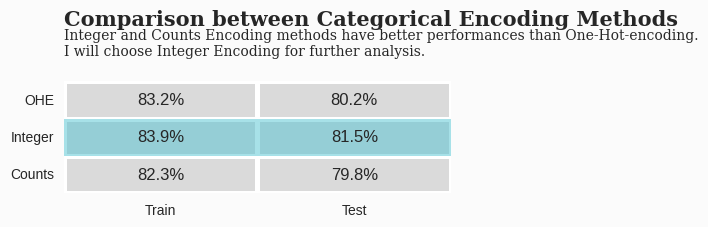

In [ ]:
import matplotlib

fig = plt.figure(figsize=(5, 8))
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

colors = ['#DADADA', '#DADADA']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

# change background color
background_color='#fbfbfb'
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color)


# overall
#df_models = round(pd.concat([svc_df, dtree_df, rfc_df, tu_rfc_df, log_df, knn_df], axis=1), 3)

sns.heatmap(cat_encoding, cmap=colormap, annot=True, fmt=".1%", linewidths=2.5, cbar=False, ax=ax0)

ax0.tick_params(axis=u'both', which=u'both', length=0)
ax0.text(0, -1.5, 'Comparison between Categorical Encoding Methods', fontfamily='serif', fontsize=15, fontweight='bold')
ax0.text(0, -0.7, 'Integer and Counts Encoding methods have better performances than One-Hot-encoding.\nI will choose Integer Encoding for further analysis.',
        fontfamily='serif', fontsize=10)


from matplotlib.patches import Rectangle
rect = ax0.add_patch(Rectangle((0, 1), 5, 1, fill=True,color='#51C4D3', edgecolor='white', lw=0,alpha=0.5))

plt.show()

**Conclusion**

I performed one-hot-encoding, label encoding and count encoding for cateogrical variables to explore which technique is good for this dataset.

Given the results above, label encoding or count encoding is the best for this. I will use Integer Encoding method in the further analysis.

**Feature Scaling**

Feature scaling is important because similar scales help machine learning models decrease the time to learn data. Also, some machine learning models (e.g. linear models, SVM) are sensitive to the scale of the variable.

I will perform several feature scaling techniques, and explore which feature scaling method is the best for this dataset.

In [ ]:
num_vars

['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain']

In [ ]:
num_vars.remove('LeaveOrNot')

In [ ]:
# numeric features and target list
use_cols = num_vars + ['Churn']

# copy data
tmp = df[use_cols]
tmp.head(2)

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,Churn
0,2017,3,34,0,Churn
1,2013,1,28,3,Exist


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    tmp.drop(['Churn'], axis=1), #predictors
    tmp['Churn'], # target
    test_size=0.2, # the percentage of test size
    random_state=0, # for reproducibility
)

X_train.shape, X_test.shape

((3722, 4), (931, 4))

**Standardization**

Standardization involves centering the variable at zero, and standardizing the variance to 1. The procedure involves subtracting the mean of each observation and then dividing by the standard deviation.

The shape of a standardized distribution will be identical to the original distribution of the variable. If the original distribution is normal, then the standardized distribution will be normal. But, if the original distribution is skewed, then the standarized distribution of the varialbe will also be skewed. Thus, standardizing a variable does not normalize the distribution of the data.

In [ ]:
# copy dataset
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# set up the scaler
standard_scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
standard_scaler.fit(X_train_stand)

# transform train and test set
X_train_stand = standard_scaler.transform(X_train_stand)
X_test_stand = standard_scaler.transform(X_test_stand)


In [ ]:
# transform the returned Numpy arrays to dataframes
X_train_stand = pd.DataFrame(X_train_stand, columns=X_train.columns)
X_test_stand = pd.DataFrame(X_test_stand, columns=X_test.columns)

**Mean normalization**

Mean normalization involves centering the variable at zero, and re-scaling to the value range. The procedure involves subtracting the mean of each observation and then dividing by difference between the minimum and maximum value.

Like standardization, this technique will not normalize the distribution of the data.

In [ ]:
# copy dataset
X_train_mean = X_train.copy()
X_test_mean = X_test.copy()

# set up the StandardScaler so that it removes the mean
# but does not divide by the standard deviation
scaler_mean = StandardScaler(with_mean=True, with_std=False)

# set up the robustscaler so that it does NOT remove the median
# but normalizes by max()-min(), importnat for this to set up
# the quantile range to 0 and 100, which represent the min and max values
scaler_minmax = RobustScaler(with_centering=False,
                            with_scaling=True,
                            quantile_range=(0,100))


# fit the scalers to the train set, it will learn the parameters
scaler_mean.fit(X_train_mean)
scaler_minmax.fit(X_train_mean)

# transform train and test sets
X_train_mean = scaler_minmax.transform(scaler_mean.transform(X_train_mean))
X_test_mean = scaler_minmax.transform(scaler_mean.transform(X_test_mean))

**MinMaxScaling**

Minimum and maximum scaling squeezes the vales between 0 and 1. The result of the transformation is a distribution which values vary within the range of 0 to 1. But the mean is not centered at zero and the standard deviation varies across variables. The shpae of a min-max scaled distribution will be similar to the original variable. This scaling technique is also sensitive to outliers.

In [ ]:
# copy dataset
X_train_minmax = X_train.copy()
X_test_minmax = X_test.copy()

# set up scaler
scaler_minmax = MinMaxScaler()


# fit the scalers to the train set, it will learn the parameters
scaler_minmax.fit(X_train_minmax)


# transform train and test sets
X_train_minmax = scaler_minmax.transform(scaler_minmax.transform(X_train_minmax))
X_test_minmax = scaler_minmax.transform(scaler_minmax.transform(X_test_minmax))

In [ ]:
# create dataframe

X_train_minmax = pd.DataFrame(X_train_minmax, columns=X_train.columns)
X_test_minmax = pd.DataFrame(X_test_minmax, columns=X_test.columns)

**MaxAbsScaling**

Maximum Absolute Scaling transforms the data to its absolute maximum value. The result is distributed which values vary within the range of -1 to 1. But the mean is not centered as zero and the standard deviation varies across variables.

This may not preserve the shape of the original distribution and it is sensitive outliers.

In [ ]:
# copy dataset
X_train_maxabs = X_train.copy()
X_test_maxabs = X_test.copy()

# set up the scale
scaler_maxabs = MaxAbsScaler()

# fit the train set
scaler_maxabs.fit(X_train_maxabs)

# transform
X_train_maxabs = scaler_maxabs.transform(X_train)
X_test_maxabs = scaler_maxabs.transform(X_test)

In [ ]:
# create dataframe
X_train_maxabs = pd.DataFrame(X_train_maxabs, columns=X_train.columns)
X_test_maxabs = pd.DataFrame(X_test_maxabs, columns=X_test.columns)

**RobustScaling**

RobustScaling removes the median from the observations and then scaled to the inter-quantile range (IQR). This produces more robust estimates for the center and range of the variable, and is recommended if the data shows outliers (and our dataset has outliers).

It may not preserve the shape of the original distribution, and the minimum and maximum values vary, but is robust outliers.

In [ ]:
# copy dataset
X_train_robust = X_train.copy()
X_test_robust = X_test.copy()

# set up the scaler
scaler_robust = RobustScaler()

# fit training set
scaler_robust.fit(X_train_robust)

# transform
X_train_robust = scaler_robust.transform(X_train_robust)
X_test_robust = scaler_robust.transform(X_test_robust)

# save as dataframe
X_train_robust = pd.DataFrame(X_train_robust, columns=X_train.columns)
X_test_robust = pd.DataFrame(X_test_robust, columns=X_test.columns)

**Evaluate model performances based on different feature scaling methods**

In [ ]:
feature_scaling = {"Original": run_RFs(X_train, X_test, y_train, y_test),
                   "Standardization": run_RFs(X_train_stand, X_test_stand, y_train, y_test),
                   "MeanNormalization": run_RFs(X_train_mean, X_test_mean, y_train, y_test),
                   "MinMaxScaling": run_RFs(X_train_minmax, X_test_minmax, y_train, y_test),
                   "MaxAbsScaling": run_RFs(X_train_maxabs, X_test_maxabs, y_train, y_test),
                   "RobustScaling": run_RFs(X_train_robust, X_test_robust, y_train, y_test)
                  }

Train set
Random Forests roc-auc: 0.784591954301638
Test set
Random Forests roc-auc: 0.7465696325752869
Train set
Random Forests roc-auc: 0.784591954301638
Test set
Random Forests roc-auc: 0.7465696325752869
Train set
Random Forests roc-auc: 0.7844088597355274
Test set
Random Forests roc-auc: 0.7456997431755106
Train set
Random Forests roc-auc: 0.784591954301638
Test set
Random Forests roc-auc: 0.7465696325752869
Train set
Random Forests roc-auc: 0.784591954301638
Test set
Random Forests roc-auc: 0.7465696325752869
Train set
Random Forests roc-auc: 0.784591954301638
Test set
Random Forests roc-auc: 0.7465696325752869


In [ ]:
feature_scaling = pd.DataFrame(feature_scaling, index=['Train', 'Test']).T

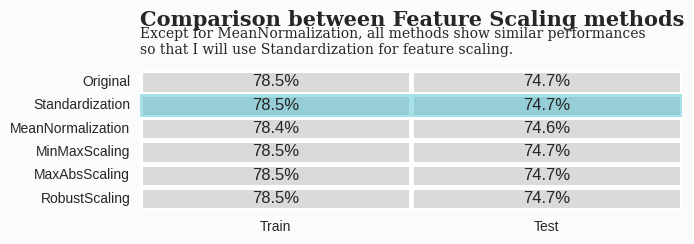

In [ ]:
import matplotlib

fig = plt.figure(figsize=(7, 10))
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

colors = ['#DADADA', '#DADADA']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

# change background color
background_color='#fbfbfb'
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color)


# overall

sns.heatmap(feature_scaling, cmap=colormap, annot=True, fmt=".1%", linewidths=2.5, cbar=False, ax=ax0)

ax0.tick_params(axis=u'both', which=u'both', length=0)
ax0.text(0, -1.9, 'Comparison between Feature Scaling methods', fontfamily='serif', fontsize=15, fontweight='bold')
ax0.text(0, -0.7, 'Except for MeanNormalization, all methods show similar performances \nso that I will use Standardization for feature scaling.',
        fontfamily='serif', fontsize=10)


from matplotlib.patches import Rectangle
rect = ax0.add_patch(Rectangle((0, 1), 5, 1, fill=True,color='#51C4D3', edgecolor='white', lw=0,alpha=0.5))

plt.show()

**Conclusion**

I tried to compare several feature scaling methods and 5 methods show similar performances except for MeanNormalization.

Therefore, I will use Standardization for feature scaling.

**Feature Importance**

Finally, I would like to explore what predictors are important to build a model.

In [ ]:
# function to show feature importance
def feat_importance(model, data):
    return pd.DataFrame({"cols": data.columns,
                        "imp": model.feature_importances_}
                       ).sort_values(by='imp', ascending=False)

In order to see the feature importance, we need to build a random forest model. I will perform as follows:

Separate into train and test set

*  Encoding categorical variables using integer encoding

*   Scaling features using StandardScaler

*  Builing a random forest model


*   Seeing feature importance







In [ ]:
df = pd.read_csv(path)

# separate train and test
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['LeaveOrNot'], axis=1),
    df['LeaveOrNot'],
    test_size=0.2,
    random_state=0
)

# integer encoding
ordinal_encoding = ce.OrdinalEncoder(
    encoding_method='arbitrary',
    variables=cat_vars
)

ordinal_encoding.fit(X_train)
X_train = ordinal_encoding.transform(X_train)
X_test = ordinal_encoding.transform(X_test)


# StandardScaler
standard_scaler = StandardScaler().fit(X_train)
X_train = pd.DataFrame(standard_scaler.transform(X_train),
                       columns=X_train.columns)
X_test = pd.DataFrame(standard_scaler.transform(X_test),
                      columns=X_test.columns)

In [ ]:
# set up rf model
rf_model = RandomForestClassifier(n_estimators=40, random_state=42, max_depth=3)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=40, random_state=42)

In [ ]:
feat_importance(rf_model, X_train)

,cols,imp
1,JoiningYear,0.442343
3,PaymentTier,0.185265
2,City,0.147294
5,Gender,0.123465
0,Education,0.066107
4,Age,0.015391
6,EverBenched,0.011860
7,ExperienceInCurrentDomain,0.008274


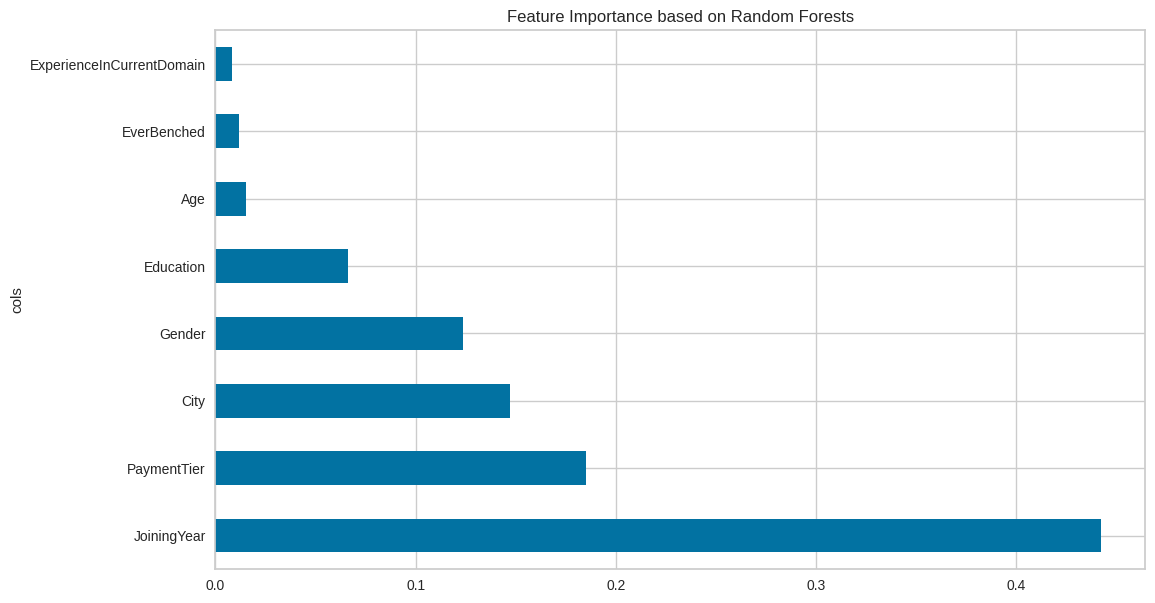

In [ ]:
feat_importance(rf_model, X_train).plot('cols', 'imp', 'barh',
                                       figsize=(12, 7), legend=False)
plt.title("Feature Importance based on Random Forests");

Joining year is the most important feature to build a model. The bottom 5 shows negligible importance on building a model.

**Conclusions**

In this notebook, we've tried to find the best methods for feature engineering and feature scaling. Since numerical variable transformations did not improve the model performances at all, I won't use it when building models later.

Based on the results above, I will perform:

Integer Encoding for categorical variables
StandardScaler for feature scaling

**Oversampling**

In [ ]:
# Data pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Modelling
from sklearn.metrics import (
    roc_auc_score,
    precision_score,
    accuracy_score,
    recall_score,
)

from sklearn.ensemble import RandomForestClassifier


# for feature engineering
from feature_engine import encoding as ce

# Evaluation & CV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score


# pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline


# for oversampling
# for the model
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import Pipeline

# for feature engineering
from feature_engine import encoding as ce

# for oversampling
from sklearn.svm import SVC
from imblearn.over_sampling import (
    RandomOverSampler,
    SMOTE,
    ADASYN,
    BorderlineSMOTE,
    SVMSMOTE
)

# for cross-validation
from imblearn.pipeline import make_pipeline

In [ ]:
df = pd.read_csv(path)

In [ ]:
def run_RFs(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=40, random_state=42, max_depth=3)
    rf.fit(X_train, y_train)

    print("Train set")
    train_pred = rf.predict_proba(X_train)
    print("Random Forests roc-auc: {}".format(roc_auc_score(y_train, train_pred[:,1])))

    print("Test set")
    test_pred = rf.predict_proba(X_test)
    print("Random Forests roc-auc: {}".format(roc_auc_score(y_test, test_pred[:, 1])))

    return roc_auc_score(y_train, train_pred[:,1]), roc_auc_score(y_test, test_pred[:, 1])

**Over-sampling methods**

All oversampling methods create new synthetic data from the minority label so that it helps balance data distribution.

We will try to compare 5 other methods based on the model performances, and choose one of them.

RandomOverSampler

SMOTE

ADASYN

BorderlineSMOTE

SVMSMOTE

First, we need to create oversampler dictionary.

In [ ]:
oversampler_dict = {

    'random': RandomOverSampler(
        sampling_strategy='auto',
        random_state=0),

    'smote': SMOTE(
        sampling_strategy='auto', # samples only the minority class
        random_state=0,
        k_neighbors=5,
        n_jobs=1),

    'adasyn': ADASYN(
        sampling_strategy='auto', # samples only the minority class
        random_state=0,
        n_neighbors=5,
        n_jobs=1),

    'border1': BorderlineSMOTE(
        sampling_strategy='auto', # samples only the minority class
        random_state=0,
        k_neighbors=5,
        m_neighbors=10,
        kind='borderline-1',
        n_jobs=1),

    'svm': SVMSMOTE(
        sampling_strategy='auto', # samples only the minority class
        random_state=0,
        k_neighbors=5,
        m_neighbors=10,
        n_jobs=1,
        svm_estimator=SVC(kernel='linear')),
}

In [ ]:
# to save the results
results_dict_over = {}
shapes_dict_over = {}

# separate train and test
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['LeaveOrNot'], axis=1),
    df['LeaveOrNot'],
    test_size=0.2,
    random_state=0
)

# integer encoding
ordinal_encoding = ce.OrdinalEncoder(
    encoding_method='arbitrary',
    variables=cat_vars
)

ordinal_encoding.fit(X_train)
X_train = ordinal_encoding.transform(X_train)
X_test = ordinal_encoding.transform(X_test)


# StandardScaler
standard_scaler = StandardScaler().fit(X_train)
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

roc = run_RFs(X_train, X_test, y_train, y_test)

# store results
results_dict_over['full_data'] = roc
shapes_dict_over['full_data'] = len(X_train)

print()

for oversampler in oversampler_dict.keys():

    print(oversampler)

    # resample
    X_resampled, y_resampled = oversampler_dict[oversampler].fit_resample(X_train, y_train)

    # evaluate performance
    roc = run_RFs(X_resampled, X_test, y_resampled, y_test)

    # store results
    results_dict_over[oversampler] = roc
    shapes_dict_over[oversampler] = len(X_resampled)
    print()

print()

Train set
Random Forests roc-auc: 0.8387467974399935
Test set
Random Forests roc-auc: 0.8147834596744128

random
Train set
Random Forests roc-auc: 0.8437982963886708
Test set
Random Forests roc-auc: 0.8134656807920135

smote
Train set
Random Forests roc-auc: 0.8559355649795523
Test set
Random Forests roc-auc: 0.8188041091918316

adasyn
Train set
Random Forests roc-auc: 0.8122880355755077
Test set
Random Forests roc-auc: 0.829033076508844

border1
Train set
Random Forests roc-auc: 0.8122865168804846
Test set
Random Forests roc-auc: 0.8244350896814547

svm
Train set
Random Forests roc-auc: 0.8444209801031537
Test set
Random Forests roc-auc: 0.820823495298455




In [ ]:
results_dict_over_df = pd.DataFrame(results_dict_over, index=['Train', 'Test']).T

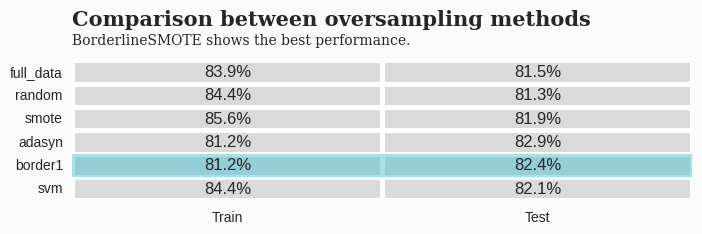

In [ ]:
import matplotlib

fig = plt.figure(figsize=(8, 10))
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

colors = ['#DADADA', '#DADADA']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

# change background color
background_color='#fbfbfb'
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color)


# overall
#df_models = round(pd.concat([svc_df, dtree_df, rfc_df, tu_rfc_df, log_df, knn_df], axis=1), 3)

sns.heatmap(results_dict_over_df, cmap=colormap, annot=True, fmt=".1%", linewidths=2.5, cbar=False, ax=ax0)

ax0.tick_params(axis=u'both', which=u'both', length=0)
ax0.text(0, -1.5, 'Comparison between oversampling methods', fontfamily='serif', fontsize=15, fontweight='bold')
ax0.text(0, -0.7, 'BorderlineSMOTE shows the best performance.',
        fontfamily='serif', fontsize=10)


from matplotlib.patches import Rectangle
#rect = ax0.add_patch(Rectangle((0, 2), 5, 1, fill=True,color='#51C4D3', edgecolor='white', lw=0,alpha=0.5))
rect = ax0.add_patch(Rectangle((0, 4), 5, 1, fill=True,color='#51C4D3', edgecolor='white', lw=0,alpha=0.5))


plt.show()

**Oversampling with Cross Validation**

In [ ]:
# function to train random forests and evaluate the performance
# with cross-validation

def run_model(X_train, y_train, oversampler=None):

    # set up the classifier
    rf = RandomForestClassifier(
            n_estimators=40, random_state=39, max_depth=3, n_jobs=1
        )


    # without sampling:
    if not oversampler:

        model = rf

    # set up a pipeline with sampling:
    else:

        # important to scale before the re-sampler
        # as the many of methods require the variables in
        # a similar scale
        model = make_pipeline(
            oversampler,
            rf,
        )


    # When we make a pipeline and then run the training of the model
    # with cross-validation, the procedure works as follows:

    # 1) take 2 of the 3 fold as train set
    # 2) resample the 2 fold (aka, the train set)
    # 3) train the model on the resampled data from point 2
    # 4) evaluate performance on the 3rd fold, that was not resampled

    # this way, we make sure that we are not evaluating the performance
    # of our classifier on the over-sampled data

    cv_results = cross_validate(
        model, # the random forest or the pipeline
        X_train, # the data that will be used in the cross-validation
        y_train, # the target
        scoring="roc_auc", # the metric that we want to evaluate
        cv=3, # the cross-validation fold
    )

    #print(
    #    'Random Forests average precision: {0} +/- {1}'.format(
    #    cv_results['test_score'].mean(), cv_results['test_score'].std()
    #    )
    #)

    print('RF roc-auc: {}'.format(cv_results['test_score']))

    return cv_results['test_score']

In [ ]:
# now we train several models, with the different oversamplers
# and with cross-validation

# to save the results
roc_dict = {}


# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('LeaveOrNot', axis=1),
    df['LeaveOrNot'],
    test_size=0.2,
    random_state=0
)

# integer encoding
ordinal_encoding = ce.OrdinalEncoder(
    encoding_method='arbitrary',
    variables=cat_vars)

ordinal_encoding.fit(X_train)
X_train = ordinal_encoding.transform(X_train)
X_test = ordinal_encoding.transform(X_test)


# StandardScaler
standard_scaler = StandardScaler().fit(X_train)
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

# train model on data with re-sampling with cross-validation
test_score = run_model(X_train, y_train)

# store results

roc_dict['full_data'] = test_score

print()


for oversampler in oversampler_dict.keys():

    print(oversampler)

    # resample, train and evaluate performance
    # with cross-validation
    test_score = run_model(X_train, y_train, oversampler_dict[oversampler])

    # store results
    roc_dict[oversampler] = test_score

    print()

print()

RF roc-auc: [0.82716428 0.85454632 0.81280557]

random
RF roc-auc: [0.82695782 0.85266745 0.81479454]

smote
RF roc-auc: [0.82625097 0.85335211 0.81177228]

adasyn
RF roc-auc: [0.84182749 0.86151779 0.8316361 ]

border1
RF roc-auc: [0.84845583 0.8543669  0.82826606]

svm
RF roc-auc: [0.83392883 0.85599889 0.81822637]




In [ ]:
roc_dict_df = pd.DataFrame(roc_dict, index=['fold1', 'fold2', 'fold3']).T

# calculate the average of test scores
roc_dict_df['mean'] = (roc_dict_df['fold1']+roc_dict_df['fold2']+roc_dict_df['fold3'])/3

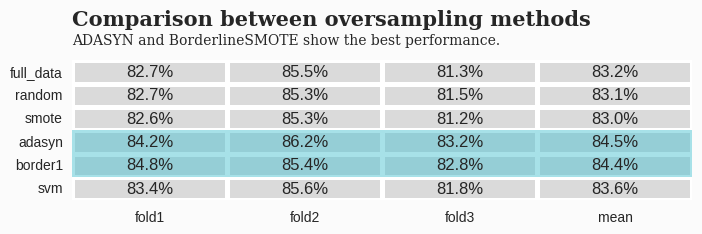

In [ ]:
import matplotlib

fig = plt.figure(figsize=(8, 10))
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

colors = ['#DADADA', '#DADADA']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

# change background color
background_color='#fbfbfb'
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color)


# overall
#df_models = round(pd.concat([svc_df, dtree_df, rfc_df, tu_rfc_df, log_df, knn_df], axis=1), 3)

sns.heatmap(roc_dict_df, cmap=colormap, annot=True, fmt=".1%", linewidths=2.5, cbar=False, ax=ax0)

ax0.tick_params(axis=u'both', which=u'both', length=0)
ax0.text(0, -1.5, 'Comparison between oversampling methods', fontfamily='serif', fontsize=15, fontweight='bold')
ax0.text(0, -0.7, 'ADASYN and BorderlineSMOTE show the best performance.',
        fontfamily='serif', fontsize=10)


from matplotlib.patches import Rectangle
rect = ax0.add_patch(Rectangle((0, 3), 5, 1, fill=True,color='#51C4D3', edgecolor='white', lw=0,alpha=0.5))
rect = ax0.add_patch(Rectangle((0, 4), 5, 1, fill=True,color='#51C4D3', edgecolor='white', lw=0,alpha=0.5))


plt.show()

**Conclusions**

I compared 5 different oversampling methods, and I found ADASYN and BorderlineSMOTE show the best performances.

I will use ADASYN to balance data when building pipeline for models.

Hyperparameter Tuning


**Introduction**

In the notebook (Building_Model_Pipeline.ipynb), we found the GradientBoosingClassifer shows the best performance for the dataset.

In this notebook, I will try to find the best hyperparameter by using Optuna.

In [ ]:
# Data pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Modelling
from sklearn.metrics import (
    roc_auc_score,
    precision_score,
    accuracy_score,
    recall_score,
)

from sklearn.ensemble import GradientBoostingClassifier


# for feature engineering
from feature_engine import encoding as ce

# Evaluation & CV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score


# pipeline
from sklearn.pipeline import Pipeline

# for oversampling
from imblearn.over_sampling import ADASYN, SMOTE

# for cross-validation
from imblearn.pipeline import make_pipeline

# for hyperparameter tuning
import optuna

In [ ]:
df = pd.read_csv(path)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['LeaveOrNot'], axis=1),
    df['LeaveOrNot'],
    test_size=0.2,
    random_state=0)

X_train.shape, X_test.shape

((3722, 8), (931, 8))

**Data Preparation**

I will perform categorical encoding, feature scaling and oversampling here.

In [ ]:
# categorical encoding
cat_encoding = ce.OrdinalEncoder(
    encoding_method='arbitrary', variables=cat_vars)

X_train = cat_encoding.fit_transform(X_train)
X_test = cat_encoding.transform(X_test)

# feature scaling
scaler = StandardScaler()

X_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns)

X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_train.columns)


# oversampling
oversampling = ADASYN(
    sampling_strategy='auto', # samples only the minority class
        random_state=0,
        n_neighbors=5,
        n_jobs=1)

X_resampled, y_resampled = oversampling.fit_resample(X_train, y_train)

In [ ]:
# new resampled X_train and y_train
X_resampled.shape, y_resampled.shape

((4648, 8), (4648,))

### Hyperparater tuning with Optuna

In [ ]:
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 100, 1000)
    criterion = trial.suggest_categorical("criterion", ['squared_error', 'friedman_mse'])
    max_depth = trial.suggest_int("max_depth", 1, 11)
    min_samples_split = trial.suggest_float("min_samples_split", 0.01, 1)
    max_features = trial.suggest_categorical("features", ['sqrt', 'log2'])
    learning_rate = trial.suggest_float("learning_rate", 0.0001, 0.1)

    model = GradientBoostingClassifier(
        n_estimators=n_estimators,
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        max_features=max_features,
        learning_rate=learning_rate
    )

    score = cross_val_score(model, X_resampled, y_resampled, cv=3, scoring='roc_auc')
    accuracy = score.mean()
    return accuracy

In [ ]:
study = optuna.create_study(
    direction='maximize',
    sampler=optuna.samplers.RandomSampler()
)

study.optimize(objective, n_trials=100)

[I 2024-03-15 14:47:41,435] A new study created in memory with name: no-name-2b899648-ee6b-4801-a8f6-a37240a25ed7
[I 2024-03-15 14:47:52,103] Trial 0 finished with value: 0.9025767475714276 and parameters: {'n_estimators': 923, 'criterion': 'squared_error', 'max_depth': 11, 'min_samples_split': 0.0451505761703744, 'features': 'sqrt', 'learning_rate': 0.046119111545383756}. Best is trial 0 with value: 0.9025767475714276.
[I 2024-03-15 14:47:52,571] Trial 1 finished with value: 0.7591065846708145 and parameters: {'n_estimators': 137, 'criterion': 'squared_error', 'max_depth': 11, 'min_samples_split': 0.9299615880930081, 'features': 'sqrt', 'learning_rate': 0.035283456889449435}. Best is trial 0 with value: 0.9025767475714276.
[I 2024-03-15 14:47:55,637] Trial 2 finished with value: 0.8975417989330197 and parameters: {'n_estimators': 613, 'criterion': 'squared_error', 'max_depth': 8, 'min_samples_split': 0.32961995772976926, 'features': 'sqrt', 'learning_rate': 0.0526346645954978}. Best i

In [ ]:
study.best_params

{'n_estimators': 659,
 'criterion': 'squared_error',
 'max_depth': 4,
 'min_samples_split': 0.09872409972094143,
 'features': 'sqrt',
 'learning_rate': 0.09800895770431829}

In [ ]:
study.best_value

0.9078690416231211

In [ ]:
study.trials_dataframe().sort_values(by='value', ascending=False).head(10)

,number,value,datetime_start,datetime_complete,duration,params_criterion,params_features,params_learning_rate,params_max_depth,params_min_samples_split,params_n_estimators,state
93,93,0.907869,2024-03-15 14:52:09.677699,2024-03-15 14:52:14.198420,0 days 00:00:04.520721,squared_error,sqrt,0.098009,4,0.098724,659,COMPLETE
74,74,0.907667,2024-03-15 14:51:14.384136,2024-03-15 14:51:23.974014,0 days 00:00:09.589878,friedman_mse,log2,0.020850,9,0.075829,930,COMPLETE
19,19,0.907659,2024-03-15 14:48:41.907190,2024-03-15 14:48:45.744478,0 days 00:00:03.837288,friedman_mse,sqrt,0.095787,10,0.178223,610,COMPLETE
14,14,0.907551,2024-03-15 14:48:25.663023,2024-03-15 14:48:29.604213,0 days 00:00:03.941190,friedman_mse,log2,0.062525,9,0.149810,497,COMPLETE
35,35,0.906868,2024-03-15 14:49:28.870355,2024-03-15 14:49:34.745705,0 days 00:00:05.875350,squared_error,log2,0.079723,11,0.330988,828,COMPLETE
8,8,0.906819,2024-03-15 14:48:05.268285,2024-03-15 14:48:10.270280,0 days 00:00:05.001995,squared_error,sqrt,0.076920,10,0.355216,981,COMPLETE
84,84,0.906796,2024-03-15 14:51:45.783073,2024-03-15 14:51:50.565128,0 days 00:00:04.782055,friedman_mse,sqrt,0.090090,7,0.300286,887,COMPLETE
17,17,0.906783,2024-03-15 14:48:33.781600,2024-03-15 14:48:38.888856,0 days 00:00:05.107256,squared_error,log2,0.085392,8,0.141411,541,COMPLETE
88,88,0.906680,2024-03-15 14:51:55.650009,2024-03-15 14:52:00.238217,0 days 00:00:04.588208,squared_error,sqrt,0.081298,9,0.225208,595,COMPLETE
12,12,0.906198,2024-03-15 14:48:19.837359,2024-03-15 14:48:23.071404,0 days 00:00:03.234045,squared_error,sqrt,0.035601,10,0.027515,261,COMPLETE


**Conclusion**
We found the best parameters for Gradient Boosting Model by using Optuna. I will use the parameters when building the final model.

In [ ]:
churn_map = {0: 'Churn',
             1: 'Existed'}
df['LeaveOrNot'] = df['LeaveOrNot'].map(churn_map)

In [ ]:
# separate into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['LeaveOrNot'], axis=1),
    df['LeaveOrNot'],
    test_size=0.2,
    random_state=0
)

X_train.shape, X_test.shape

((3722, 8), (931, 8))

**ML Comparison**

Here, I will compare 6 different machine learning algorithms based on the performances, and I will choose best 3 models later.

Let's write machine learning pipeline.

In [ ]:
# this is the best paramter we found
# in hyperparater tuning notebook

# set the paramters
best_param = {

 'n_estimators': 659,
 'criterion': 'squared_error',
 'max_depth': 4,
 'min_samples_split': 0.09872409972094143,
 'features': 'sqrt',
 'learning_rate': 0.09800895770431829}

In [ ]:
# Remove the 'features' key from best_param
best_param.pop('features', None)

# Create the imbalanced pipeline
model_pipe = imbPipeline([

    # categorical encoding
    ("cat_encoding", ce.OrdinalEncoder(
        encoding_method='arbitrary', variables=cat_vars)),

    # feature scaling
    ("scale", StandardScaler()),

    # oversampling with ADASYN
    ("oversampling", ADASYN(sampling_strategy='auto', random_state=0, n_neighbors=5)),

    # classifier
    ("gbm", GradientBoostingClassifier(**best_param))
])

In [ ]:
# set up multiple scoring
scoring = {'accuracy': 'accuracy',
           'recall': 'recall_macro',
           'precision': 'precision_macro',
           'roc-auc': 'roc_auc'}

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
scores = cross_validate(model_pipe, X_train, y_train, scoring=scoring,
                        cv=cv, n_jobs=-1)

In [ ]:
print(scores.keys())

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_recall', 'test_precision', 'test_roc-auc'])


In [ ]:
# create scores as dataframe
scores_df = pd.DataFrame(pd.Series(scores))

# set column name
scores_df.columns = ['scores']

# create an empty column
scores_df['GBM_with_best_params'] = np.NaN

# create a column showing the average of scores
for i in range(len(scores_df)):
    scores_df['GBM_with_best_params'][i] = scores_df['scores'][i].mean()

# drop unuseful columns
scores_df.drop(['scores'], axis=1, inplace=True)

scores_df = scores_df.T
scores_df.drop(['fit_time', 'score_time'], axis=1, inplace=True)

# change index names in order to combine this with baseline GBM scores
scores_df = scores_df.T
scores_df.index = ['Accuracy', 'Recall', 'Precision', 'ROC AUC score']
scores_df

,GBM_with_best_params
Accuracy,0.838261
Recall,0.802317
Precision,0.832333
ROC AUC score,0.866255


###  Building Model Pipeline

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from collections import Counter

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

from pathlib import Path
import os
os.getcwd()

'/content'

In [14]:
# Data pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate

# Modelling
from sklearn.metrics import (
    roc_auc_score,
    precision_score,
    accuracy_score,
    recall_score,
)

from yellowbrick.classifier import ROCAUC, PrecisionRecallCurve

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier)

import xgboost as xgb

# for feature engineering
from feature_engine import encoding as ce
# Evaluation & CV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import (
    KFold,
    cross_val_score,
    RepeatedStratifiedKFold)


# pipeline
from sklearn.pipeline import Pipeline

# for oversampling
from imblearn.over_sampling import ADASYN, SMOTE

# since sklearn pipeline doesn't work well with oversampling
# we need to use imblearn package's pipeline
from imblearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline as imbPipeline

# for hyperparameter tuning
import optuna

In [21]:
df = pd.read_csv(path)

In [22]:
df.head(2)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1


In [16]:
# create lists for categorical and numerical variables
cat_vars = [var for var in df.columns if df[var].dtype=='O' and var != 'LeaveOrNot']
num_vars = [var for var in df.columns if df[var].dtype!='O']

print('The number of categorical variables: {}'.format(len(cat_vars)))
print('The number of numerical vairables: {}'.format(len(num_vars)))

The number of categorical variables: 4
The number of numerical vairables: 5


In [17]:
df['LeaveOrNot'].value_counts()

0    3053
1    1600
Name: LeaveOrNot, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['LeaveOrNot'], axis=1),
    df['LeaveOrNot'],
    test_size=0.2,
    random_state=0)

X_train.shape, X_test.shape

((3722, 8), (931, 8))

**ML Comparison**

Here, I will compare 6 different machine learning algorithms based on the performances, and I will choose best 3 models later.

Let's write machine learning pipeline.

In [24]:
models = [
    ('LR', LogisticRegression(max_iter=1000)),
    ('SVC', SVC(kernel='rbf', C=0.025, probability=True)),
    ('KNN', KNeighborsClassifier(n_neighbors=2)),
    ('RF', RandomForestClassifier()),
    ('ADA', AdaBoostClassifier()),
    ('GBM', GradientBoostingClassifier())
]

In [29]:
# create a name list
fnames = []



for name, model in models:

    pipe = Pipeline([
        # Integer Encoding for Categorical Variable
        ('encoding', ce.OrdinalEncoder(
            encoding_method='arbitrary', variables=cat_vars)),

        # Feature Scaling
        ('scaler', StandardScaler()),


        # models
        ('classifier', model)
    ])


    pipe.fit(X_train, y_train)

    pipe_prediction = pipe.predict(X_test)
    ml_data = pd.DataFrame(data=[accuracy_score(y_test, pipe_prediction),
                           recall_score(y_test, pipe_prediction),
                           precision_score(y_test, pipe_prediction),
                           roc_auc_score(y_test, pipe_prediction)],
                     columns=[name + 'Score'],
                     index = ['Accuracy', 'Recall', 'Precision', 'roc-auc'])
    ml_data.to_csv('{}.csv'.format(name))
    fnames.append(name)

In [30]:
#fnames = ['LR', 'SVC', 'KNN', 'RF', 'ADA', 'GBM']
table = [pd.read_csv('{}.csv'.format(fname)) for fname in fnames]

df_LR, df_SVC, df_KNN, df_RF, df_ADA, df_GBM = table

# create models_df that have matrix results
models_df = pd.concat(table, axis=1)
models_df.index = ['Accuracy', 'Recall', 'Precision', 'ROC AUC score']
models_df.drop('Unnamed: 0', axis=1, inplace=True)

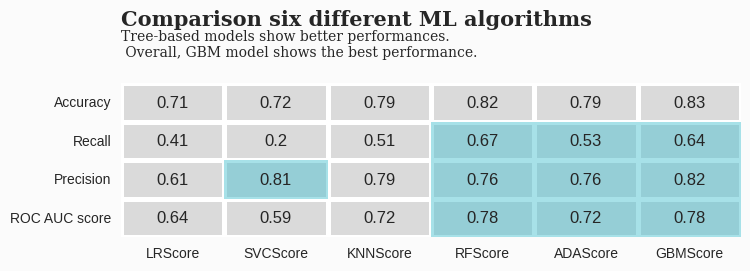

In [31]:
import matplotlib

fig = plt.figure(figsize=(8, 11))
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

colors = ['#DADADA', '#DADADA']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

# change background color
background_color='#fbfbfb'
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color)


# overall
#df_models = round(pd.concat([svc_df, dtree_df, rfc_df, tu_rfc_df, log_df, knn_df], axis=1), 3)

sns.heatmap(models_df, cmap=colormap, annot=True, linewidths=2.5, cbar=False, ax=ax0)

ax0.tick_params(axis=u'both', which=u'both', length=0)
ax0.text(0, -1.5, 'Comparison six different ML algorithms', fontfamily='serif', fontsize=15, fontweight='bold')
ax0.text(0, -0.7, 'Tree-based models show better performances.\n Overall, GBM model shows the best performance.',
        fontfamily='serif', fontsize=10)


from matplotlib.patches import Rectangle
rect = ax0.add_patch(Rectangle((3, 1), 3, 3, fill=True,color='#51C4D3', edgecolor='white', lw=0,alpha=0.5))
rect2 = ax0.add_patch(Rectangle((1, 2), 1, 1, fill=True,color='#51C4D3', edgecolor='white', lw=0,alpha=0.5))
plt.show()

**Pipeline for GBM model**


We found gbm model shows the best performance. Also, I found the best hyperparameters by using Optuna in the [HyperparameterTuningForGBM]. (If you want to see more detail, please take a look at the notebook).

In [32]:
df = pd.read_csv(path)

In [33]:
# separate into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['LeaveOrNot'], axis=1),
    df['LeaveOrNot'],
    test_size=0.2,
    random_state=0
)

X_train.shape, X_test.shape

((3722, 8), (931, 8))

In [34]:
# this is the best paramter we found
# in hyperparater tuning notebook

# set the paramters
best_param = {

 'n_estimators': 659,
 'criterion': 'squared_error',
 'max_depth': 4,
 'min_samples_split': 0.09872409972094143,
 'features': 'sqrt',
 'learning_rate': 0.09800895770431829}

In [36]:
# Remove the 'features' key from best_param
best_param.pop('features', None)

model_pipe = imbPipeline([

    # categorical encoding
    ("cat_encoding", ce.OrdinalEncoder(
        encoding_method='arbitrary', variables=cat_vars)),

    # feature scaling
    ("scale", StandardScaler()),

    # oversampling with ADASYN
    ("oversampling", ADASYN(sampling_strategy='auto', random_state=0, n_neighbors=5)),

    # classifier
    ("gbm", GradientBoostingClassifier(**best_param))
])

In [37]:
# set up multiple scoring
scoring = {'accuracy': 'accuracy',
           'recall': 'recall_macro',
           'precision': 'precision_macro',
           'roc-auc': 'roc_auc'}

In [38]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
scores = cross_validate(model_pipe, X_train, y_train, scoring=scoring,
                        cv=cv, n_jobs=-1)

#print("Mean ROC AUC: %.3f" % np.mean(scores))

In [39]:
print(scores.keys())

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_recall', 'test_precision', 'test_roc-auc'])


In [40]:
# create scores as dataframe
scores_df = pd.DataFrame(pd.Series(scores))

# set column name
scores_df.columns = ['scores']

# create an empty column
scores_df['GBM_with_best_params'] = np.NaN

# create a column showing the average of scores
for i in range(len(scores_df)):
    scores_df['GBM_with_best_params'][i] = scores_df['scores'][i].mean()

# drop unuseful columns
scores_df.drop(['scores'], axis=1, inplace=True)

scores_df = scores_df.T
scores_df.drop(['fit_time', 'score_time'], axis=1, inplace=True)

# change index names in order to combine this with baseline GBM scores
scores_df = scores_df.T
scores_df.index = ['Accuracy', 'Recall', 'Precision', 'ROC AUC score']
scores_df

,GBM_with_best_params
Accuracy,0.848023
Recall,0.810267
Precision,0.846998
ROC AUC score,0.871230


In [41]:
# Combine baseline's GBMscores and new GBM scores
new_df = pd.concat([models_df['GBMScore'], scores_df], axis=1)

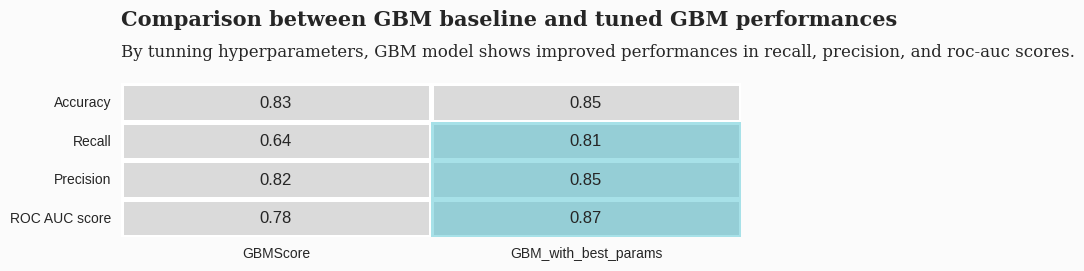

In [42]:
import matplotlib

fig = plt.figure(figsize=(8, 11))
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

colors = ['#DADADA', '#DADADA']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

# change background color
background_color='#fbfbfb'
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color)


# overall

sns.heatmap(new_df, cmap=colormap, annot=True, linewidths=2.5, cbar=False, ax=ax0)

ax0.tick_params(axis=u'both', which=u'both', length=0)
ax0.text(0, -1.5, 'Comparison between GBM baseline and tuned GBM performances', fontfamily='serif', fontsize=15, fontweight='bold')
ax0.text(0, -0.7, 'By tunning hyperparameters, GBM model shows improved performances in recall, precision, and roc-auc scores.',
        fontfamily='serif', fontsize=12)


from matplotlib.patches import Rectangle
rect = ax0.add_patch(Rectangle((1, 1), 3, 3, fill=True,color='#51C4D3', edgecolor='white', lw=0,alpha=0.5))

plt.show()

By tuning hyperparameters, we got the improved final model's performance (0.83 of ROC-AUC score) increased by 9% compared to the baseline (0.78 of ROC-AUC).

**Conclusion**

In this notebook, we compared six different algorithms, and we found Gradient Boosting model showed the best performance. Therefore, we tried to find the best hyperparameters by using Optuna in [HyperparamterTuningForGBM.ipynb].

By using the best hyperparamters, we got an improved GBM model showing 9% increased performance (0.83 of ROC-AUC score) compared to the baseline (0.78 of ROC-AUC).